<a href="https://colab.research.google.com/github/BeatrizPCandido/Banco_dados/blob/main/analise_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de dados com Pandas

In [2]:
import pandas as pd

In [3]:
#importando o arquino csv
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")


In [4]:
#fazendo consulta da base de dados
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [5]:
# trazendo informação do meu dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
# descrição dos dados do DF
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
#quantidade de linhas e colunas da base de dados
df.shape


(133349, 11)

In [8]:
#trazendo os dados de linhas e colunas mais detalhado
linhas, colunas = df.shape[0], df.shape[1]
print('Quaqntidade de linha', linhas)
print('Quantidade de colunas', colunas)


Quaqntidade de linha 133349
Quantidade de colunas 11


In [9]:
#consultando as colunas da base de dados
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Renomenando as colunas do DataFrame


In [10]:
#dicionario de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


# Analisando quais são as categorias das colunas categóricas

In [11]:
# Analisando nivl de senioridade
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
#tipo de contrato
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
# Regime de trabalho
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [14]:
# Tamanho da empresa
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [15]:
# moificando o nivel de senioridade
senioridade = {
    'MI': 'Pleno',
    'SE': 'Senior',
    'EN': 'Junior',
    'EX': 'Executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [16]:
# modificando o tipo de contrato
contrato = {
    'FT': 'Integral',
    'PT': 'Parcial',
    'FL':  'Freelancer',
    'CT': 'Contrato'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [17]:
# Modificando o tsmanho da empresa
tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Media',
    'L': 'Grande'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [18]:
# modificando mapa de trabalho
remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}
df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [19]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Podemos também resumir as informações categóricas com o método describe(), exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:

Qual o nível de experiência mais comum na base de dados?

Qual é o tipo de contrato mais frequente?

Qual o cargo mais frequente na amostra?

De qual país são a maioria dos profissionais da base?

Qual é o país onde mais empresas da amostra estão sediadas?

Qual o regime de trabalho mais comum?

Qual é o tamanho mais comum das empresas na amostra?

In [21]:
# Qual o nível de experiência mais comum na base de dados?
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


# Aula 2 - Preparação e limpeza dos Dados



capaitar para renomear colunas, identificar e tratat dados faltabntes

In [22]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [23]:
# veficar valores nulos
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#contagem de dados nulos
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [25]:
#checando valores unicos do ano no df
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [26]:
#exibindo as linhas com ano nulos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [27]:
# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.


     Estratégia           
---
 Imputação

*   Imputação inteligente
*   Remoção de linhas
*   Preenchimento baseado em regra


---


      Quando Usar


---


*   Quando os dados faltantes são significativos para a análise
*   Quando o volume de nulos é pequeno e não afeta o dataset
*   Quando há lógica ou negócio claro para inferir o valor




                                     

                                

Exemplos fictícios
Exemplo de preenchimento com média e mediana

In [28]:
# importando a biblioteca numpy
import numpy as np

In [29]:
# prenencher os valores do salario nulos com a mediana criando um dataframe
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]

})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios




,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


In [30]:
#criar um dataframe de temperatura
df_temperaturas  = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]

})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()
df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [31]:
#exemplo de preenchimento com valor fixo, vamos ciar um DataFrame cidade
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades


,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


# Tratando o nosso DataFrame


In [32]:
#remoção das linhas com anos nulos
df_limpo = df.dropna(subset=['ano'])
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [33]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


# Alterando o tipo de dados

In [34]:
# Deixar o ano com,o Numererico inteiro:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [35]:
#Podemos usar assign() para retornar um novo DataFrame com a modificação:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [36]:
#Mostrar como salvar um arquivo após ter sido limpo e preparado para análises posteriores:
df_limpo.to_csv('dados-imersao.csv', index=False)

In [37]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


#Criando um gráfico com a própria biblioteca Pandas

In [38]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

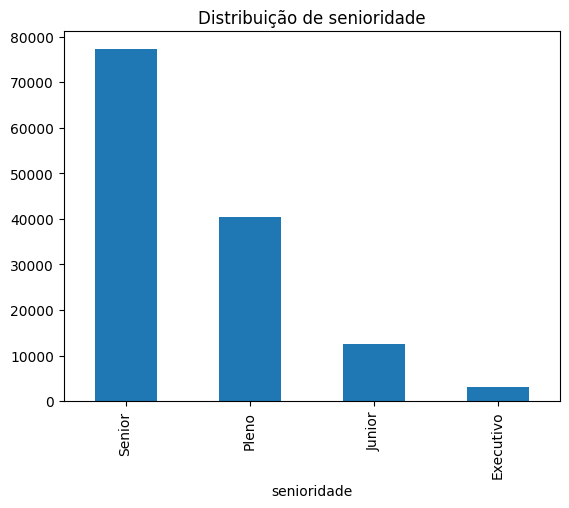

In [39]:
#Qual o nível de experiência mais comum na base de dados
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")


In [40]:
# importando a biblioteca seaborn
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

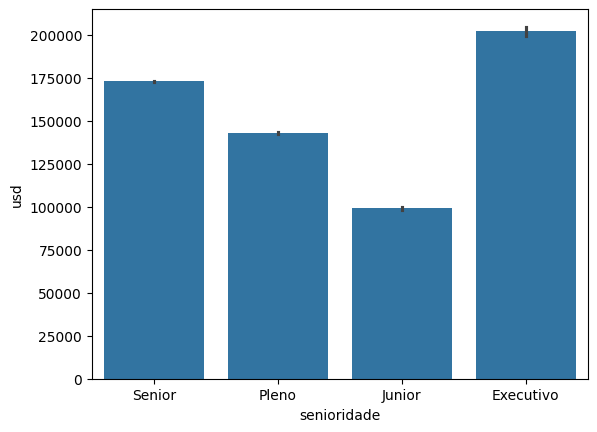

In [41]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')


In [42]:
# importando a biblioteca matplotlib para criação de grafico
import matplotlib.pyplot as plt

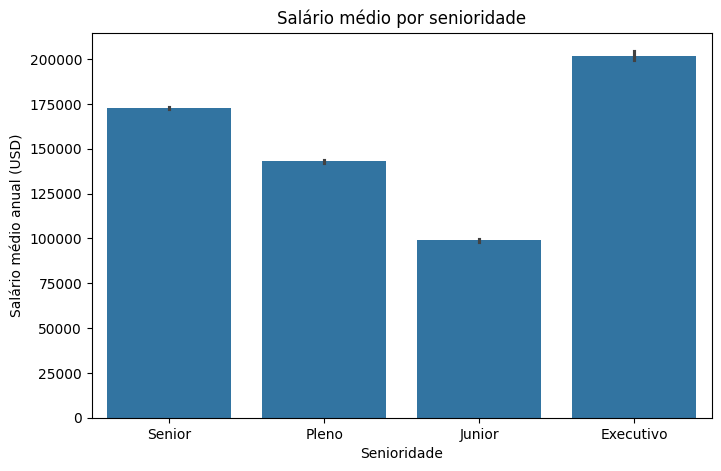

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [44]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)


,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [45]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index


In [46]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

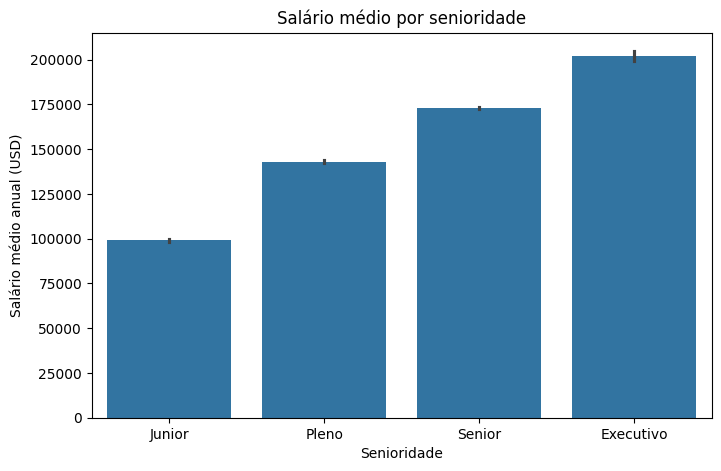

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()


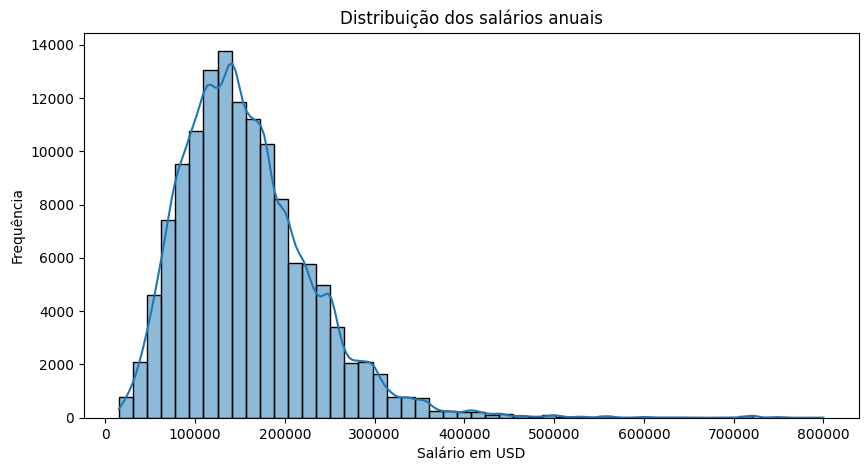

In [48]:
# grafico histografo
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

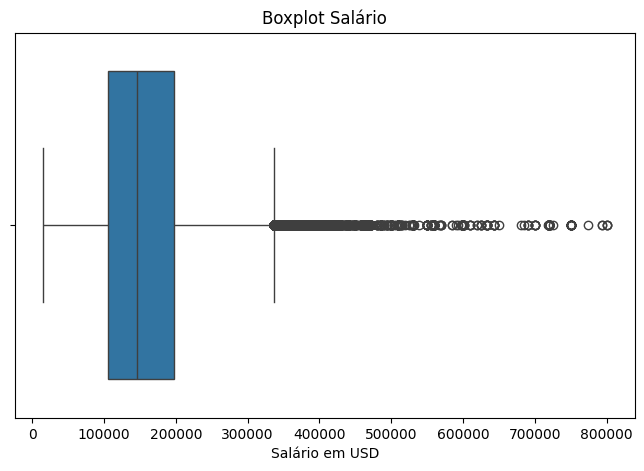

In [49]:
#grafico botplost
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()


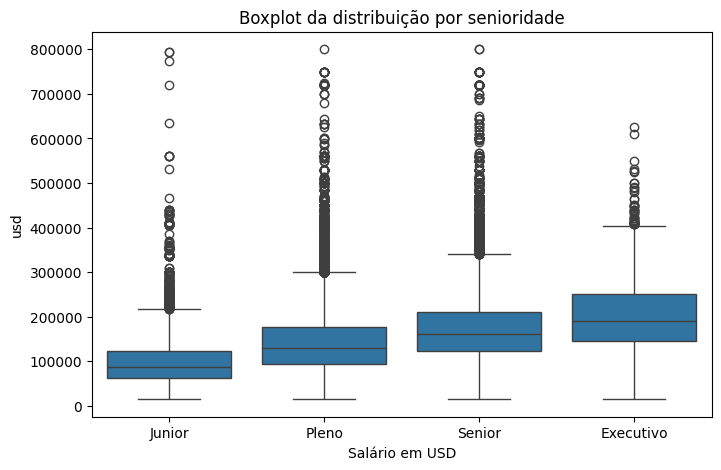

In [50]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

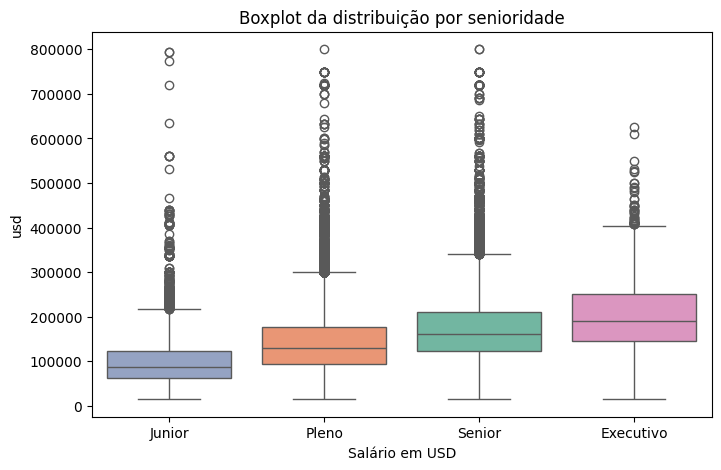

In [52]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()


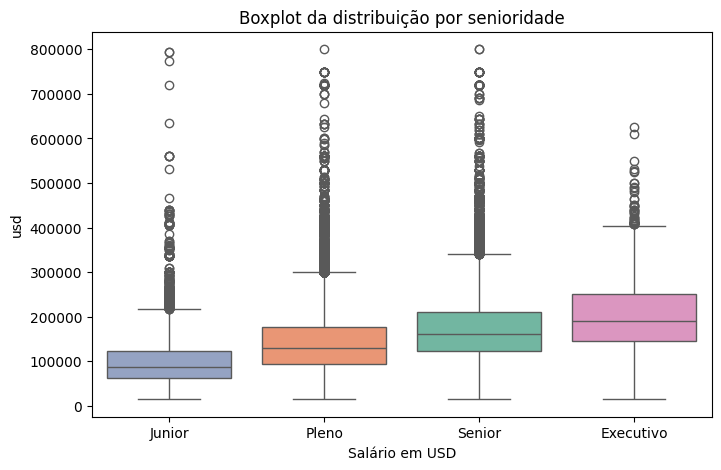

In [53]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [54]:
# importanso a biblioteca plotly.express
import plotly.express as px

In [55]:
# Criar um gráfico de média salarial por senioridade em barras usando o plotly
fig = px.bar(df_limpo.groupby('senioridade')['usd'].mean().reset_index(),
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'},
             color='senioridade',
             category_orders={"senioridade": ordem_senioridade})
fig.show()

In [56]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [57]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()


In [58]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()



In [59]:

remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [60]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [61]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.6 MB/s eta 0:00:00


In [62]:
import pycountry

In [63]:
#função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [64]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA


In [65]:

df_limpo.to_csv('dados-imersao-final.csv', index=False)

In [66]:
df_limpo.to_csv

<bound method NDFrame.to_csv of          ano senioridade  contrato                     cargo  salario moeda  \
0       2025      Senior  Integral        Solutions Engineer   214000   USD   
1       2025      Senior  Integral        Solutions Engineer   136000   USD   
2       2025       Pleno  Integral             Data Engineer   158800   USD   
3       2025       Pleno  Integral             Data Engineer   139200   USD   
4       2025      Junior  Integral             Data Engineer    90000   USD   
...      ...         ...       ...                       ...      ...   ...   
133344  2020      Senior  Integral            Data Scientist   412000   USD   
133345  2021       Pleno  Integral  Principal Data Scientist   151000   USD   
133346  2020      Junior  Integral            Data Scientist   105000   USD   
133347  2020      Junior  Contrato     Business Data Analyst   100000   USD   
133348  2021      Senior  Integral            Data Scientist  7000000   INR   

           usd residencia      remoto empresa tamanho_empresa residencia_iso3  
0       214000         US      Remoto      US           Media             USA  
1       136000         US      Remoto      US           Media             USA  
2       158800         AU  Presencial      AU           Media             AUS  
3       139200         AU  Presencial      AU           Media             AUS  
4        90000         US  Presencial      US           Media             USA  
...        ...        ...         ...     ...             ...             ...  
133344  412000         US      Remoto      US          Grande             USA  
133345  151000         US      Remoto      US          Grande             USA  
133346  105000         US      Remoto      US         Pequena             USA  
133347  100000         US      Remoto      US          Grande             USA  
133348   94665         IN     Hibrido      IN          Grande             IND  

[133339 rows x 12 columns]>